In [12]:
import numpy as np
import numpy.linalg
import scipy as sp
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [94]:
def covariance(x1, x2):
    x1 = np.expand_dims(x1, 1)
    x2 = np.expand_dims(x2, 1)
    sq_norm = -0.5 * sp.spatial.distance.cdist(x1, x2, 'sqeuclidean')
    return np.exp(sq_norm)

In [98]:
covariance(X1,[1])

array([[1.        ],
       [0.60653066],
       [0.13533528],
       [0.011109  ]])

In [70]:
num_samples = 41
num_functions = 5
X = np.expand_dims(np.linspace(-4, 4, num_samples), 1)
Sigma = covariance(X, X)
ys = np.random.multivariate_normal(mean = np.zeros(num_samples), cov=Sigma, size=num_functions)
confidence = np.array([covariance([x], [x]) for x in X])
confidence = np.concatenate(confidence, axis=0)

In [72]:
np.shape(X)

(41, 1)

In [61]:
def sample(num_samples, num_functions, x1, x2, mean_vals):
    X = np.expand_dims(np.linspace(x1, x2, num_samples), 1)
    Sigma = covariance(X, X)
    ys = np.random.multivariate_normal(mean = mean_vals, cov=Sigma, size=num_functions)
    confidence = np.array([covariance([x], [x]) for x in X])
    confidence = np.concatenate(confidence, axis=0)
    return ys, confidence, X

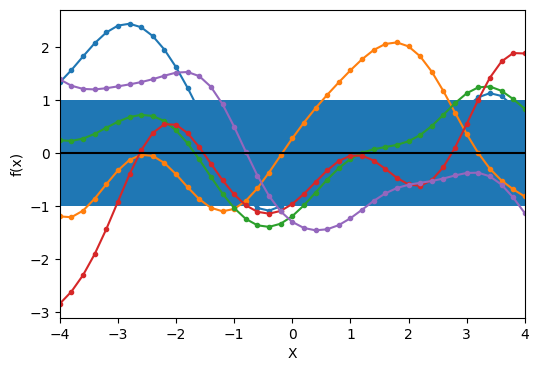

In [56]:
plt.figure(figsize=(6,4))
for i in range(num_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.plot(X, np.zeros(num_samples), color='0')
plt.fill_between(np.rot90(X)[0], np.rot90(confidence)[0], np.rot90(-confidence)[0])
plt.xlabel('X')
plt.ylabel('f(x)')
plt.xlim([-4,4])
plt.show()

In [58]:
def plot(num_functions, num_samples, ys, confidence, X):
    plt.figure(figsize=(6,4))
    for i in range(num_functions):
        plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
    plt.plot(X, np.zeros(num_samples), color='0')
    plt.fill_between(np.rot90(X)[0], np.rot90(confidence)[0], np.rot90(-confidence)[0])
    plt.xlabel('X')
    plt.ylabel('f(x)')
    plt.xlim([-4,4])
    plt.show()

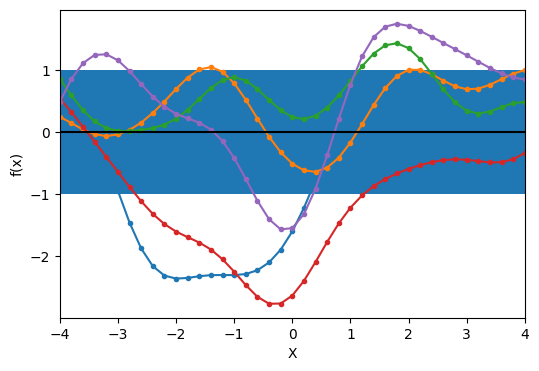

In [62]:
ys, confidence, X = sample(num_samples, num_functions, -4, 4, np.zeros(num_samples))
plot(num_functions, num_samples, ys, confidence, X)

In [138]:
def prior_mean(X):
    if np.shape(x) == ():
        return 0
    return np.zeros(len(X))

In [140]:
def cross_covariance(X1, x):
    if np.shape(x) == ():
        return covariance(X1, [x])
    return covariance(X1, x)
def posterior_mean(X1, Y1, x, prior_mean, Precision):
    return prior_mean(x) + np.linalg.matmul(np.rot90(cross_covariance(X1, x)), np.linalg.matmul(Precision, Y1-prior_mean(X1)))

In [143]:
for x in X2:
    print(posterior_mean(X1, Y1, x, prior_mean, Precision))

[1.55037945]
[2.41301513]
[3.69197669]


In [131]:
X1 = np.array([1,2,3,4])
Y1 = np.array([1,2,3,4])
X2 = np.array([1.5, 2.5, 3.5])
Sigma = covariance(X1, X1)
Precision = np.linalg.inv(Sigma)
posterior_mean(X1, Y1, 1.5, prior_mean, Precision)

array([1.55037945])

In [154]:
def GP_posterior(X1, Y1, kernel, X2):
    Sigma = kernel(X1, X1)
    Precision = np.linalg.inv(Sigma)
    mean_vals = []
    for x in X2:
        mean_vals.append(posterior_mean(X1, Y1, x, prior_mean, Precision))
    return mean_vals

In [158]:
vals = GP_posterior(X1, Y1, covariance, X)

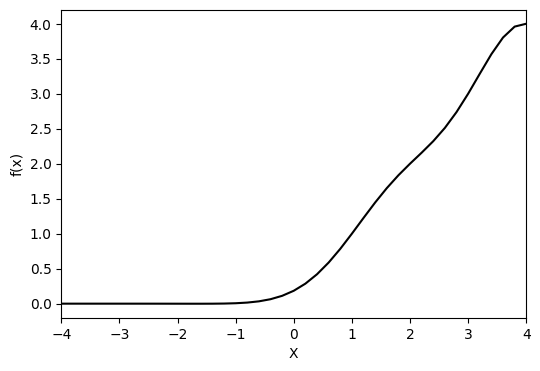

In [159]:
plt.figure(figsize=(6,4))
plt.plot(X, vals, color='0')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.xlim([-4,4])
plt.show()